MovieWriter PillowWriter unavailable; using Pillow instead.


-1.161187420807834 1.4220444581024846e-16 0.8611874208078342 -1.0546504183582789e-16


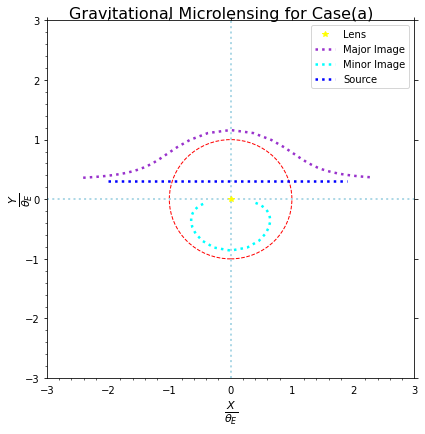

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

from matplotlib.ticker import AutoMinorLocator

pc = (3.09) * 1e+16
Ms = 2 * 1e30

Dl = 10 * pc
Ds = 500 * pc
Dls = Ds - Dl
Ml = 100 * Ms
G = 6.67 * (1e-11)
c = 3 * (1e+8)

Rs = (2 * G * Ml) / (c ** 2)

theta_e = np.sqrt((2 * Rs * Dls) / (Dl * Ds))
Re = theta_e * Dl


def gl_img(theta_e, xs, ys):
    # theta_s=(np.sqrt((xs**2)+(ys**2)))/Ds
    u = np.sqrt((xs ** 2) + (ys ** 2))

    y_plus = (u + np.sqrt(u ** 2 + 4)) / 2
    y_minus = abs(u - np.sqrt(u ** 2 + 4)) / 2

    if xs == 0:
        phi = np.pi / 2
    elif xs < 0 and ys > 0:
        phi = np.pi - abs(np.arctan(ys / xs))
    elif xs > 0 and ys > 0:
        phi = np.arctan(ys / xs)
    elif xs < 0 and ys < 0:
        phi = np.pi + abs(np.arctan(ys / xs))
    elif ys == 0 and xs < 0:
        phi = np.pi
    elif xs > 0 and ys < 0:
        phi = 2 * (np.pi) - abs(np.arctan(ys / xs))

    XI = (y_plus * np.cos(phi))
    YI = y_plus * np.sin(phi)
    xi = -(y_minus * np.cos(phi))
    yi = -(y_minus * np.sin(phi))

    A_plus = (u ** 2 + 2) / (2 * u * np.sqrt(u ** 2 + 4)) + 0.5
    A_min = abs((u ** 2 + 2) / (2 * u * np.sqrt(u ** 2 + 4)) - 0.5)

    return XI, YI, xi, yi, A_plus, A_min


xs = -0.3;
ys = 0

XI, YI, xi, yi, Ap, Am = gl_img(theta_e, xs, ys)
print(XI, YI, xi, yi)

fig, ax = plt.subplots(figsize=(6, 6))
einstein_ring = plt.Circle((0, 0), 1, color='red', fill=False, ls='--', label='Einstein Ring')
ax.add_artist(einstein_ring)

# I_plus=ax.plot(XI,YI, 'o', color='yellow',label='Major Image',lw=3)
# I_minus=ax.plot(xi,yi,'o',color='cyan',label='Minor Image',lw=3)
# src=ax.plot(xs,ys,'o',color='darkgreen',label='Source')

ax.set_ylabel(r'$\frac{Y}{\theta_E}$', va='center', rotation='vertical', fontsize=16)
ax.set_xlabel(r'$\frac{X}{\theta_E}$', ha='center', fontsize=16)

# ax.tick_params(labeltop = False)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# ax.legend([einstein_ring], ['Einstein ring'])

fig.tight_layout()
ax.tick_params(bottom=False, top=True, left=True, right=True)
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.axvline(x=0, ls='dotted', color='lightblue', lw=2)
plt.axhline(y=0, ls='dotted', color='lightblue', lw=2)
fig.text(0.52, 0.97, 'Gravitational Microlensing for Case(a)', ha='center', fontsize=16)

# plt.show()

lens = ax.plot(0, 0, '*', color='Yellow', lw=3, label='Lens')
# line, = axis.plot([], [], lw = 2)
line1, = ax.plot([], [], lw=2.5, color='darkorchid', ls='dotted', label='Major Image')
line2, = ax.plot([], [], lw=2.5, color='cyan', ls='dotted', label='Minor Image')
line3, = ax.plot([], [], lw=2.5, color='blue', ls='dotted', label='Source')


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    # text.set_text('')
    return line1, line2, line3,


xdata1, ydata1 = [], []
xdata2, ydata2 = [], []
xdata3, ydata3 = [], []

ax.legend()


# ax.legend([line1,line2,line3,lens], ['Major Image','Major Image','Source','Lens'])


# ax.legend([line2], ['I-'])
# ax.legend([line3], ['source'])
def animate(i):
    h1 = 0.1 * i
    h2 = 0
    x0 = -2;
    y0 = 0.3
    xs = x0 + h1;
    ys = y0 + h2;
    XI, YI, xi, yi, Ap, Am = gl_img(theta_e, xs, ys)

    xdata1.append(XI)
    ydata1.append(YI)

    xdata2.append(xi)
    ydata2.append(yi)

    xdata3.append(xs)
    ydata3.append(ys)

    line1.set_data(xdata1, ydata1)
    line2.set_data(xdata2, ydata2)
    line3.set_data(xdata3, ydata3)

    # text.set_text('e='+str(e))
    return line1, line2, line3,


anim = animation.FuncAnimation(fig, animate, init_func=init, frames=40, interval=120)  # ,blit=True)
anim.save('Case(i).gif', writer='PillowWriter')
plt.show()
